# LEITURA DOS DATASETS

In [1]:
import pandas as pd
pesquisa = pd.read_csv('pesquisa.csv', sep=';')
extensao = pd.read_csv('extensao.csv', sep=';')

# PREPARAÇÃO DE DADOS

In [2]:
from datetime import datetime

#Cria as colunas e insere zero em todas as linhas delas
pesquisa['duracao_dias'] = 0
pesquisa['duracao_meses'] = 0

#for para percorrer todas as linhas do dataframe
for linha in range(len(pesquisa.index)):
  # Salva a data de início do projeto em variável
  inicio = pesquisa.loc[linha, 'inicio_execucao']
  # Salva a data de fim do projeto em variável
  fim = pesquisa.loc[linha, 'fim_execucao']

  #Converte para datetime as datas início e fim
  d1 = datetime.strptime(inicio, "%Y-%m-%d")
  d2 = datetime.strptime(fim, "%Y-%m-%d")

  #Calcula o tempo em dias entre a data de início e fim
  pesquisa.loc[linha, 'duracao_dias'] = float((abs((d2 - d1).days)))

  #Calcula o tempo em meses entre a data de início e fim
  pesquisa.loc[linha, 'duracao_meses'] = float((abs((d2 - d1).days/30)))

C:\Users\Matheus Fernando\AppData\Local\Temp\ipykernel_7172\3526062966.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pesquisa.loc[linha, 'duracao_meses'] = float((abs((d2 - d1).days/30)))


In [3]:
from datetime import datetime

#Cria as colunas e insere zero em todas as linhas delas
extensao['duracao_dias'] = 0
extensao['duracao_meses'] = 0

#for para percorrer todas as linhas do dataframe
for linha in range(len(extensao.index)):
  # Salva a data de início do projeto em variável
  inicio = extensao.loc[linha, 'inicio_execucao']
  # Salva a data de fim do projeto em variável
  fim = extensao.loc[linha, 'fim_execucao']

  #Converte para datetime as datas início e fim
  d1 = datetime.strptime(inicio, "%Y-%m-%d")
  d2 = datetime.strptime(fim, "%Y-%m-%d")

  #Calcula o tempo em dias entre a data de início e fim
  extensao.loc[linha, 'duracao_dias'] = float((abs((d2 - d1).days)))

  #Calcula o tempo em meses entre a data de início e fim
  extensao.loc[linha, 'duracao_meses'] = float((abs((d2 - d1).days/30)))

C:\Users\Matheus Fernando\AppData\Local\Temp\ipykernel_7172\556318237.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.566666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  extensao.loc[linha, 'duracao_meses'] = float((abs((d2 - d1).days/30)))


In [4]:
#pd.set_option('display.max_rows', None)
#pesquisa
#pesquisa.groupby('area_conhecimento')['area_conhecimento'].count()
#pesquisa.groupby('sub_area_conhecimento')['sub_area_conhecimento'].count()
#extensao
#extensao.groupby('area_conhecimento')['area_conhecimento'].count()

# Mudança nos nomes das colunas que correpondem a mesma área nos dois dataframes
pesquisa.rename(columns={'sub_area_conhecimento': 'area'}, inplace = True)
extensao.rename(columns={'area_conhecimento': 'area'}, inplace = True)

# Criação da coluna tipo indentificado o que é pesquisa e o que é extensão
pesquisa['tipo'] = 'pesquisa'
extensao['tipo'] = 'extensao'

# Junção dos dois dataframes
projetos = pd.concat([pesquisa, extensao])

# Dataframe com todos os projetos de pesquisa e extensão
projetos



,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo,foco_tecnologico
0,ENGENHARIA DE MINAS,Teste,2015-06-24,Não Enviado,ENGENHARIAS,Teste,Rafael Hernandez Damascena dos Passos,1,2015-06-06,30200008.0,30000009.0,"Rafael Hernandez Damascena dos Passos, Jose Yv...",Teste,Núcleo de Empreendedorismo Inovador-IFRN,RE,18,0.600000,pesquisa,NaN
1,ZOOTECNIA,Esta pesquisa terá como objetivos avaliar e co...,2016-03-31,Concluído,CIÊNCIAS AGRÁRIAS,A baixa ingestão de nutrientes é uma constante...,Itala Iara Medeiros de Araujo,2,2015-09-01,50400002.0,50000004.0,"Talita Georgia da Cunha, Ronildo Pereira de Me...",DESENVOLVIMENTO E AVALIAÇÃO SENSORIAL DE BISCO...,Grupo de Pesquisa em Produção Orgânica no Semi...,IP,212,7.066667,pesquisa,NaN
2,CIÊNCIA E TECNOLOGIA DE ALIMENTOS,O mercado de produtos diet a cada ano mostra-s...,2016-03-07,Não selecionado,CIÊNCIAS AGRÁRIAS,O consumo de produtos deslactosado por in...,Aquileine Mainomy Benicio de Carvalho,3,2015-09-07,50700006.0,50000004.0,"Emilia Erica Dantas Medeiros, Aquileine Mainom...",Elaboração de doce de chocolate diet sem lacto...,NaN,CN,182,6.066667,pesquisa,NaN
3,ZOOTECNIA,"A falta de forragem, principalmente no período...",2015-12-30,Não Enviado,CIÊNCIAS AGRÁRIAS,Em construção,Genildo Fonseca Pereira,4,2014-01-27,50400002.0,50000004.0,"Emanuelly Muniz Garcia, Antônia Géssica Beatri...",AVALIAÇÃO DAS CARACTARÍSTICAS MORFOGÊNICAS E E...,Núcleo de Pesquisa em Agropecuária,AP,702,23.400000,pesquisa,NaN
4,ENGENHARIA CIVIL,O setor da construção civil é um dos ramos da ...,2016-03-31,Concluído,ENGENHARIAS,A busca por soluções que impliquem na redução ...,Manoel Dias da Cunha Junior,5,2015-09-01,30100003.0,30000009.0,"Cleanto Carlos de Queiroz Junior, Manoel Dias ...",ANÁLISE DA EXEQUIBILIDADE TÉCNICA DE BLOCOS DE...,Qualidade e Produtividade no Setor da Construç...,CNAT,212,7.066667,pesquisa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ENGENHARIA DE PRODUÇÃO,"<p style=""text-align: justify;""><span style=""f...",2019-12-31,NaN,NaN,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Rafaelli Freire Costa Gentil,4531,2019-09-02,NaN,NaN,"Jennifer Wesla da Silva Oliveira, Rafaelli Fre...",ANÁLISE DAS OPERAÇÕES DE UMA EMPRESA DE PRODUÇ...,NaN,SGA,120,4.000000,extensao,Gestão e Infraestrutura
3218,MATEMÁTICA,"<p style=""text-align: justify;"">O projeto &ldq...",2019-12-23,NaN,NaN,"<p style=""text-align: justify;"">Diminuir a def...",Rafael Pereira de Melo,4532,2019-09-23,NaN,NaN,"Willian Amarildo Bezerra de Morais, João Pedro...",MATEMÁTICA BÁSICA,NaN,CNAT,91,3.033333,extensao,"Educação, Indústria, Construção Civil, Recurso..."
3219,INTERDISCIPLINAR,"<p align=""justify"" class=""western"" style=""marg...",2020-01-31,NaN,NaN,"<p align=""justify"" class=""western"" style=""marg...",Alan Klinger Sousa Alves,4533,2019-09-30,NaN,NaN,Alan Klinger Sousa Alves,Escape room de informática,NaN,IP,123,4.100000,extensao,Agroecologia e Cerâmica
3220,BIOTECNOLOGIA,<p>A educa&ccedil;&atilde;o ambiental &eacute;...,2019-12-31,NaN,NaN,<p>O projeto &ldquo;Educa&ccedil;&atilde;o amb...,Tereza Amelia Lopes Cizenando Guedes Rocha,4534,2019-10-01,NaN,NaN,"Tereza Amelia Lopes Cizenando Guedes Rocha, Jo...",Espaço verde - Experiência ambiental na Escola...,NaN,IP,91,3.033333,extensao,Agroecologia e Cerâmica


In [5]:
pesquisa[pesquisa.campus == 'CANG']

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo
63,ENGENHARIA ELÉTRICA,O projeto de pesquisa tem a intenção de aprese...,2016-03-31,Concluído,ENGENHARIAS,"Nos próximos cinco anos, a demanda total de...",Aldayr Dantas de Araujo Junior,64,2015-09-01,30400007,30000009,"Rafaella Tanoeiro de Oliveira Souza, Matheus G...",Estudo da matriz energética do Rio Grande do N...,Energias,CANG,212,7.066667,pesquisa
78,TURISMO,O planejamento do turismo envolve diversas eta...,2014-03-31,Concluído,CIÊNCIAS SOCIAIS APLICADAS,Vale ressaltar não somente a importância do en...,Darlyne Fontes Virginio,79,2013-11-15,61300004,60000007,"Darlyne Fontes Virginio, Renata Paula Costa Tr...",Inventário da Oferta Turística de Canguaretama/RN,Núcleo de Pesquisas em Empreendedorismo no Set...,CANG,136,4.533333,pesquisa
79,SOCIOLOGIA,"A presente pesquisa, realizará análise das re...",2016-04-04,Não selecionado,CIÊNCIAS HUMANAS,A demanda pela compreensão das dinâmicas soci...,Marcio Monteiro Maia,80,2015-09-04,70200009,70000000,"Thiago Antonio de Oliveira, Marcio Monteiro Maia",Solar Logos: Análise Socioespacial do patrimôn...,Educação do Campo,CANG,213,7.100000,pesquisa
119,TURISMO,O objeto geral deste projeto consiste em anali...,2016-03-31,Concluído,CIÊNCIAS SOCIAIS APLICADAS,Na perspectiva do uso público de unidades de c...,Paula Normandia Moreira Brumatti,120,2015-09-01,61300004,60000007,"Carla de Freitas Chaves, Paula Normandia Morei...",O uso público das Unidades de Conservação da m...,Núcleo de Pesquisas em Empreendedorismo no Set...,CANG,212,7.066667,pesquisa
135,TURISMO,O projeto teve início no ano de 2014 e consegu...,2016-03-30,Concluído,CIÊNCIAS SOCIAIS APLICADAS,Realizar ações que incentivem o desenvolviment...,Darlyne Fontes Virginio,136,2014-02-10,61300004,60000007,"Darlyne Fontes Virginio, Renata Paula Costa Tr...",Trilhas da Microrregião do Litoral Sul: Mapeam...,Núcleo de Pesquisas em Empreendedorismo no Set...,CANG,779,25.966667,pesquisa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,CIÊNCIA DA COMPUTAÇÃO,O presente projeto tem como objetivo estudar e...,2019-12-31,Enviado,CIÊNCIAS EXATAS E DA TERRA,Apesar da onipresença dos microcontroladores e...,Edson Anibal de Macedo Reis Batista,3749,2019-09-04,10300007,10000003,"Luis Felipe Bezerril de Lima, Edson Anibal de ...",Protótipo de um robô aspirador de pó,Núcleo de Inovação em Computação (NIC),CANG,118,3.933333,pesquisa
3574,CIÊNCIA DA COMPUTAÇÃO,A comunidade do Catu dos Eleotérios está local...,2019-12-27,Enviado,CIÊNCIAS EXATAS E DA TERRA,Identificamos que existem registros históricos...,Eberton da Silva Marinho,3758,2019-02-04,10300007,10000003,"Vandregefson da Costa Arcanjo, Bianca Alexandr...",Guia On-line da Comunidade Indígena do Catu do...,Educação do Campo,CANG,326,10.866667,pesquisa
3581,CIÊNCIA DA COMPUTAÇÃO,Este projeto consiste na criação de um cartão ...,2020-09-08,Em execução,CIÊNCIAS EXATAS E DA TERRA,Devido a demanda identificada por um s...,Eberton da Silva Marinho,3765,2019-09-09,10300007,10000003,"Luiz Gustavo Bezerra Rodrigues, Wagner da Silv...",Projeto Cartão Fidelidade Tempero Cunhaú,Núcleo de Inovação em Computação (NIC),CANG,365,12.166667,pesquisa
3583,CIÊNCIA DA COMPUTAÇÃO,Este projeto tem como objetivo desenvo...,2020-09-08,Enviado,CIÊNCIAS EXATAS E DA TERRA,Devido a demanda identificada por um ...,Eberton da Silva Marinho,3767,2019-09-09,10300007,10000003,"Everton Castro Bezerra Silva, David Soares Car...",Projeto Captação de Eventos para o NCB,Núcleo de Inovação em Computação (NIC),CANG,365,12.166667,pesquisa


In [6]:
pesquisa[pesquisa.coordenador == 'Bruno Gomes de Araujo']

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo
520,CIÊNCIA DA COMPUTAÇÃO,A leitura é uma prática considerada importante...,2016-04-20,Concluído,CIÊNCIAS EXATAS E DA TERRA,"Segundo Guedes e Souza (2004), a tarefa de ens...",Bruno Gomes de Araujo,521,2015-07-21,10300007,10000003,"Rafael Pereira de Alexandria Soares, Pâmela Ca...",e-Leitura,Núcleo de Inovação em Computação (NIC),CANG,274,9.133333,pesquisa
1227,CIÊNCIA DA COMPUTAÇÃO,O projeto Lógica Nerd tem como principal objet...,2017-07-31,Concluído,CIÊNCIAS EXATAS E DA TERRA,A área da educação carece de metodologias que ...,Bruno Gomes de Araujo,1289,2016-09-01,10300007,10000003,"Jadson Luis de Oliveira, Bruno Gomes de Araujo",Lógica Nerd: Aplicativo para auxiliar o proces...,Núcleo de Inovação em Computação (NIC),CANG,333,11.100000,pesquisa
1648,CIÊNCIA DA COMPUTAÇÃO,O uso racional da água e energia é de suma imp...,2018-01-31,Concluído,CIÊNCIAS EXATAS E DA TERRA,A sustentabilidade e uso racional da água e en...,Bruno Gomes de Araujo,1750,2017-05-01,10300007,10000003,"Pedro Henrique Amorim de Azevedo, Mikael Borge...",SIVIC – Dispositivo Inteligente para o Consumo...,Núcleo de Inovação em Computação (NIC),CANG,275,9.166667,pesquisa
1684,INTERDISCIPLINAR,"O projeto de pesquisa ""apliCANGUARETAMA: ident...",2018-02-28,Cancelado,MULTIDISCIPLINAR,Como estratégia de socializar conhecimentos so...,Bruno Gomes de Araujo,1787,2017-08-01,90100000,90000005,"Simeone Gregorio dos Santos, Semaias Rangel de...",apliCANGUARETAMA: construindo identidades cult...,Núcleo de Inovação em Computação (NIC),CANG,211,7.033333,pesquisa
1788,CIÊNCIA DA COMPUTAÇÃO,As pessoas com deficiências enfrentam diariame...,2018-07-18,Concluído,CIÊNCIAS EXATAS E DA TERRA,Os deficiências enfrentam muitas dificuldades ...,Bruno Gomes de Araujo,1927,2017-08-02,10300007,10000003,"Vivianny Caroline Félix Bezerra, Milenna Nunes...",ConsPlay: Jogo Multi-plataforma para Conscient...,Núcleo de Inovação em Computação (NIC),CANG,350,11.666667,pesquisa
2028,CIÊNCIA DA COMPUTAÇÃO,.,2018-07-18,Não Enviado,CIÊNCIAS EXATAS E DA TERRA,.,Bruno Gomes de Araujo,2175,2017-08-14,10300007,10000003,"Cleverton Inácio Bezerra, Anderson Marinho de ...",NHelp - Aplicativo para auxiliar doações à ent...,Núcleo de Inovação em Computação (NIC),CANG,338,11.266667,pesquisa
2083,CIÊNCIA DA COMPUTAÇÃO,As páginas web estão ganhando notoriedade na d...,2017-12-29,Concluído,CIÊNCIAS EXATAS E DA TERRA,A comunidade externa ao IFRN (Instituto Federa...,Bruno Gomes de Araujo,2234,2017-08-01,10300007,10000003,"Maelison de Oliveira Lira, Heverton Gomes, Dal...",Desenvolvimento de um Website para o Núcleo de...,Núcleo de Inovação em Computação (NIC),CANG,150,5.000000,pesquisa
2084,CIÊNCIA DA COMPUTAÇÃO,Este projeto de pesquisa caracteriza-se por te...,2017-12-29,Concluído,CIÊNCIAS EXATAS E DA TERRA,A importância desta pesquisa se dá para o Inst...,Bruno Gomes de Araujo,2235,2017-08-01,10300007,10000003,"Maria Eugênia Duarte Pacheco Portasio, Bruno G...",Desenvolvimento de site responsivo para o even...,Núcleo de Inovação em Computação (NIC),CANG,150,5.000000,pesquisa


In [7]:
pesquisa['tipo'] = 'pesquisa'
pesquisa

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo
0,ENGENHARIA DE MINAS,Teste,2015-06-24,Não Enviado,ENGENHARIAS,Teste,Rafael Hernandez Damascena dos Passos,1,2015-06-06,30200008,30000009,"Rafael Hernandez Damascena dos Passos, Jose Yv...",Teste,Núcleo de Empreendedorismo Inovador-IFRN,RE,18,0.600000,pesquisa
1,ZOOTECNIA,Esta pesquisa terá como objetivos avaliar e co...,2016-03-31,Concluído,CIÊNCIAS AGRÁRIAS,A baixa ingestão de nutrientes é uma constante...,Itala Iara Medeiros de Araujo,2,2015-09-01,50400002,50000004,"Talita Georgia da Cunha, Ronildo Pereira de Me...",DESENVOLVIMENTO E AVALIAÇÃO SENSORIAL DE BISCO...,Grupo de Pesquisa em Produção Orgânica no Semi...,IP,212,7.066667,pesquisa
2,CIÊNCIA E TECNOLOGIA DE ALIMENTOS,O mercado de produtos diet a cada ano mostra-s...,2016-03-07,Não selecionado,CIÊNCIAS AGRÁRIAS,O consumo de produtos deslactosado por in...,Aquileine Mainomy Benicio de Carvalho,3,2015-09-07,50700006,50000004,"Emilia Erica Dantas Medeiros, Aquileine Mainom...",Elaboração de doce de chocolate diet sem lacto...,NaN,CN,182,6.066667,pesquisa
3,ZOOTECNIA,"A falta de forragem, principalmente no período...",2015-12-30,Não Enviado,CIÊNCIAS AGRÁRIAS,Em construção,Genildo Fonseca Pereira,4,2014-01-27,50400002,50000004,"Emanuelly Muniz Garcia, Antônia Géssica Beatri...",AVALIAÇÃO DAS CARACTARÍSTICAS MORFOGÊNICAS E E...,Núcleo de Pesquisa em Agropecuária,AP,702,23.400000,pesquisa
4,ENGENHARIA CIVIL,O setor da construção civil é um dos ramos da ...,2016-03-31,Concluído,ENGENHARIAS,A busca por soluções que impliquem na redução ...,Manoel Dias da Cunha Junior,5,2015-09-01,30100003,30000009,"Cleanto Carlos de Queiroz Junior, Manoel Dias ...",ANÁLISE DA EXEQUIBILIDADE TÉCNICA DE BLOCOS DE...,Qualidade e Produtividade no Setor da Construç...,CNAT,212,7.066667,pesquisa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,CIÊNCIA DA COMPUTAÇÃO,A interoperabilidade dos sistemas de informaçã...,2020-02-28,Enviado,CIÊNCIAS EXATAS E DA TERRA,"O SIABI, sistema de controle de acervo das bib...",Denys Alexandre Barboza da Silva,3776,2019-08-30,10300007,10000003,"Geraldo Eloi de Souza Filho, Denys Alexandre B...",PROTÓTIPO DE SISTEMA PARA A BIBLIOTECA DO IFRN...,Núcleo de Pesquisa e Extensão em Tecnologia da...,CN,182,6.066667,pesquisa
3593,HISTÓRIA,A abordagem de personalidades importantes para...,2020-03-10,Enviado,CIÊNCIAS HUMANAS,"Durante as aulas de história, foi percebido q...",Aldinizia de Medeiros Souza,3777,2019-09-09,70500002,70000000,"Elizabeth Cristina da Silva Oliveira, Juliana ...","Em defesa da liberdade: Luiz Gama, o protagoni...",Núcleo de Inovação e Pesquisa do Agreste Norte...,NC,183,6.100000,pesquisa
3594,QUÍMICA,A manipueira é um fluido residual extraído da ...,2020-01-06,Enviado,CIÊNCIAS EXATAS E DA TERRA,"No Brasil, a cana-de-açúcar é a matéri...",Andrea Claudia Oliveira Silva,3778,2019-09-17,10600000,10000003,"Maria Alice Lira Nelo de Oliveira, Janiele de ...",PRODUÇÃO DE ÁLCOOL A PARTIR DA MANIPUEIRA E ME...,Química do Agreste Potiguar,NC,111,3.700000,pesquisa
3595,CIÊNCIA DA COMPUTAÇÃO,"Com o passar dos anos, a utilização, por parte...",2019-12-21,Em edição,CIÊNCIAS EXATAS E DA TERRA,Como objetivo o objetivo principal desta pesqu...,Luciano Alexandre de Farias Silva,3780,2019-07-22,10300007,10000003,"Gerson Dantas Dos Santos, Luciano Alexandre de...",GERAÇÃO DO LIKE: REDES SOCIAIS TÊM AFETADO A A...,Núcleo de Pesquisa e Extensão em Tecnologia da...,CN,152,5.066667,pesquisa


In [8]:
extensao['tipo'] = 'extensao'
extensao

,resumo,fim_execucao,area,justificativa,coordenador,id,inicio_execucao,foco_tecnologico,equipe,titulo,campus,duracao_dias,duracao_meses,tipo
0,Resumo\r\n \r\nDois elementos inspiram a propo...,2012-12-14,EDUCAÇÃO,"O ensino-aprendizagem de inglês, hoje, no Bras...",Priscila Tiziana Seabra Marques da Silva,10,2012-05-01,"Educação, Indústria, Construção Civil, Recurso...","Rafael Costa Varela, Aline Alves de Macedo, Pr...",Teachers' Learning Center,SGA,227,7.566667,extensao
1,"De acordo com o PPP do IFRN, e sendo a Extensã...",2012-12-31,ENGENHARIA CIVIL,"Este projeto de extensão, vinculado ao Núcleo ...",Aldan Nobrega Borges,11,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...","Joatã da Paz Gois, Fernanda Karen Melo da Cost...",NEPP - NUCLEO DE EXTENSAO E PRATICA PROFISSIONAL,CNAT,213,7.100000,extensao
2,O presente projeto pretende dar uma acessoria ...,2012-12-31,ARQUITETURA E URBANISMO,Como a terceira idade passa por alterações ana...,Joana Darc da Costa Silva,12,2012-06-01,"Educação, Indústria, Construção Civil, Recurso...","Erica Ricelle Costa e Silva, Deivison Luan Xav...",Bem estar na terceira idade,CNAT,213,7.100000,extensao
3,O projeto apresentado objetiva a capacitação d...,2012-12-31,ADMINISTRAÇÃO,O projeto em foco tem como finalidade ofertar ...,Jorge Fernandes Jales Neto,13,2012-06-01,"Indústria, Construção Civil e Petróleo e Gás","Jorge Fernandes Jales Neto, Antonio Claudio No...",Qualificação em Processos Licitatórios do Gove...,MO,213,7.100000,extensao
4,RESUMO\r\n\r\n\r\n A dificuldade no aprendiza...,2012-12-30,MATEMÁTICA,JUSTIFICATIVA\r\n\r\nAo longo da vida escolar ...,Gilberto Fernandes do Nascimento,14,2012-04-16,"Educação, Indústria, Construção Civil, Recurso...",Gilberto Fernandes do Nascimento,ESTIMULANDO O APRENDIZADO DE MATEMÁTICA,SGA,258,8.600000,extensao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,"<p style=""text-align: justify;""><span style=""f...",2019-12-31,ENGENHARIA DE PRODUÇÃO,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Rafaelli Freire Costa Gentil,4531,2019-09-02,Gestão e Infraestrutura,"Jennifer Wesla da Silva Oliveira, Rafaelli Fre...",ANÁLISE DAS OPERAÇÕES DE UMA EMPRESA DE PRODUÇ...,SGA,120,4.000000,extensao
3218,"<p style=""text-align: justify;"">O projeto &ldq...",2019-12-23,MATEMÁTICA,"<p style=""text-align: justify;"">Diminuir a def...",Rafael Pereira de Melo,4532,2019-09-23,"Educação, Indústria, Construção Civil, Recurso...","Willian Amarildo Bezerra de Morais, João Pedro...",MATEMÁTICA BÁSICA,CNAT,91,3.033333,extensao
3219,"<p align=""justify"" class=""western"" style=""marg...",2020-01-31,INTERDISCIPLINAR,"<p align=""justify"" class=""western"" style=""marg...",Alan Klinger Sousa Alves,4533,2019-09-30,Agroecologia e Cerâmica,Alan Klinger Sousa Alves,Escape room de informática,IP,123,4.100000,extensao
3220,<p>A educa&ccedil;&atilde;o ambiental &eacute;...,2019-12-31,BIOTECNOLOGIA,<p>O projeto &ldquo;Educa&ccedil;&atilde;o amb...,Tereza Amelia Lopes Cizenando Guedes Rocha,4534,2019-10-01,Agroecologia e Cerâmica,"Tereza Amelia Lopes Cizenando Guedes Rocha, Jo...",Espaço verde - Experiência ambiental na Escola...,IP,91,3.033333,extensao


In [9]:
projetos = pd.concat([pesquisa, extensao])
projetos

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo,foco_tecnologico
0,ENGENHARIA DE MINAS,Teste,2015-06-24,Não Enviado,ENGENHARIAS,Teste,Rafael Hernandez Damascena dos Passos,1,2015-06-06,30200008.0,30000009.0,"Rafael Hernandez Damascena dos Passos, Jose Yv...",Teste,Núcleo de Empreendedorismo Inovador-IFRN,RE,18,0.600000,pesquisa,NaN
1,ZOOTECNIA,Esta pesquisa terá como objetivos avaliar e co...,2016-03-31,Concluído,CIÊNCIAS AGRÁRIAS,A baixa ingestão de nutrientes é uma constante...,Itala Iara Medeiros de Araujo,2,2015-09-01,50400002.0,50000004.0,"Talita Georgia da Cunha, Ronildo Pereira de Me...",DESENVOLVIMENTO E AVALIAÇÃO SENSORIAL DE BISCO...,Grupo de Pesquisa em Produção Orgânica no Semi...,IP,212,7.066667,pesquisa,NaN
2,CIÊNCIA E TECNOLOGIA DE ALIMENTOS,O mercado de produtos diet a cada ano mostra-s...,2016-03-07,Não selecionado,CIÊNCIAS AGRÁRIAS,O consumo de produtos deslactosado por in...,Aquileine Mainomy Benicio de Carvalho,3,2015-09-07,50700006.0,50000004.0,"Emilia Erica Dantas Medeiros, Aquileine Mainom...",Elaboração de doce de chocolate diet sem lacto...,NaN,CN,182,6.066667,pesquisa,NaN
3,ZOOTECNIA,"A falta de forragem, principalmente no período...",2015-12-30,Não Enviado,CIÊNCIAS AGRÁRIAS,Em construção,Genildo Fonseca Pereira,4,2014-01-27,50400002.0,50000004.0,"Emanuelly Muniz Garcia, Antônia Géssica Beatri...",AVALIAÇÃO DAS CARACTARÍSTICAS MORFOGÊNICAS E E...,Núcleo de Pesquisa em Agropecuária,AP,702,23.400000,pesquisa,NaN
4,ENGENHARIA CIVIL,O setor da construção civil é um dos ramos da ...,2016-03-31,Concluído,ENGENHARIAS,A busca por soluções que impliquem na redução ...,Manoel Dias da Cunha Junior,5,2015-09-01,30100003.0,30000009.0,"Cleanto Carlos de Queiroz Junior, Manoel Dias ...",ANÁLISE DA EXEQUIBILIDADE TÉCNICA DE BLOCOS DE...,Qualidade e Produtividade no Setor da Construç...,CNAT,212,7.066667,pesquisa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ENGENHARIA DE PRODUÇÃO,"<p style=""text-align: justify;""><span style=""f...",2019-12-31,NaN,NaN,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Rafaelli Freire Costa Gentil,4531,2019-09-02,NaN,NaN,"Jennifer Wesla da Silva Oliveira, Rafaelli Fre...",ANÁLISE DAS OPERAÇÕES DE UMA EMPRESA DE PRODUÇ...,NaN,SGA,120,4.000000,extensao,Gestão e Infraestrutura
3218,MATEMÁTICA,"<p style=""text-align: justify;"">O projeto &ldq...",2019-12-23,NaN,NaN,"<p style=""text-align: justify;"">Diminuir a def...",Rafael Pereira de Melo,4532,2019-09-23,NaN,NaN,"Willian Amarildo Bezerra de Morais, João Pedro...",MATEMÁTICA BÁSICA,NaN,CNAT,91,3.033333,extensao,"Educação, Indústria, Construção Civil, Recurso..."
3219,INTERDISCIPLINAR,"<p align=""justify"" class=""western"" style=""marg...",2020-01-31,NaN,NaN,"<p align=""justify"" class=""western"" style=""marg...",Alan Klinger Sousa Alves,4533,2019-09-30,NaN,NaN,Alan Klinger Sousa Alves,Escape room de informática,NaN,IP,123,4.100000,extensao,Agroecologia e Cerâmica
3220,BIOTECNOLOGIA,<p>A educa&ccedil;&atilde;o ambiental &eacute;...,2019-12-31,NaN,NaN,<p>O projeto &ldquo;Educa&ccedil;&atilde;o amb...,Tereza Amelia Lopes Cizenando Guedes Rocha,4534,2019-10-01,NaN,NaN,"Tereza Amelia Lopes Cizenando Guedes Rocha, Jo...",Espaço verde - Experiência ambiental na Escola...,NaN,IP,91,3.033333,extensao,Agroecologia e Cerâmica


In [10]:
projetos.reset_index()
projetos

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo,foco_tecnologico
0,ENGENHARIA DE MINAS,Teste,2015-06-24,Não Enviado,ENGENHARIAS,Teste,Rafael Hernandez Damascena dos Passos,1,2015-06-06,30200008.0,30000009.0,"Rafael Hernandez Damascena dos Passos, Jose Yv...",Teste,Núcleo de Empreendedorismo Inovador-IFRN,RE,18,0.600000,pesquisa,NaN
1,ZOOTECNIA,Esta pesquisa terá como objetivos avaliar e co...,2016-03-31,Concluído,CIÊNCIAS AGRÁRIAS,A baixa ingestão de nutrientes é uma constante...,Itala Iara Medeiros de Araujo,2,2015-09-01,50400002.0,50000004.0,"Talita Georgia da Cunha, Ronildo Pereira de Me...",DESENVOLVIMENTO E AVALIAÇÃO SENSORIAL DE BISCO...,Grupo de Pesquisa em Produção Orgânica no Semi...,IP,212,7.066667,pesquisa,NaN
2,CIÊNCIA E TECNOLOGIA DE ALIMENTOS,O mercado de produtos diet a cada ano mostra-s...,2016-03-07,Não selecionado,CIÊNCIAS AGRÁRIAS,O consumo de produtos deslactosado por in...,Aquileine Mainomy Benicio de Carvalho,3,2015-09-07,50700006.0,50000004.0,"Emilia Erica Dantas Medeiros, Aquileine Mainom...",Elaboração de doce de chocolate diet sem lacto...,NaN,CN,182,6.066667,pesquisa,NaN
3,ZOOTECNIA,"A falta de forragem, principalmente no período...",2015-12-30,Não Enviado,CIÊNCIAS AGRÁRIAS,Em construção,Genildo Fonseca Pereira,4,2014-01-27,50400002.0,50000004.0,"Emanuelly Muniz Garcia, Antônia Géssica Beatri...",AVALIAÇÃO DAS CARACTARÍSTICAS MORFOGÊNICAS E E...,Núcleo de Pesquisa em Agropecuária,AP,702,23.400000,pesquisa,NaN
4,ENGENHARIA CIVIL,O setor da construção civil é um dos ramos da ...,2016-03-31,Concluído,ENGENHARIAS,A busca por soluções que impliquem na redução ...,Manoel Dias da Cunha Junior,5,2015-09-01,30100003.0,30000009.0,"Cleanto Carlos de Queiroz Junior, Manoel Dias ...",ANÁLISE DA EXEQUIBILIDADE TÉCNICA DE BLOCOS DE...,Qualidade e Produtividade no Setor da Construç...,CNAT,212,7.066667,pesquisa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ENGENHARIA DE PRODUÇÃO,"<p style=""text-align: justify;""><span style=""f...",2019-12-31,NaN,NaN,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Rafaelli Freire Costa Gentil,4531,2019-09-02,NaN,NaN,"Jennifer Wesla da Silva Oliveira, Rafaelli Fre...",ANÁLISE DAS OPERAÇÕES DE UMA EMPRESA DE PRODUÇ...,NaN,SGA,120,4.000000,extensao,Gestão e Infraestrutura
3218,MATEMÁTICA,"<p style=""text-align: justify;"">O projeto &ldq...",2019-12-23,NaN,NaN,"<p style=""text-align: justify;"">Diminuir a def...",Rafael Pereira de Melo,4532,2019-09-23,NaN,NaN,"Willian Amarildo Bezerra de Morais, João Pedro...",MATEMÁTICA BÁSICA,NaN,CNAT,91,3.033333,extensao,"Educação, Indústria, Construção Civil, Recurso..."
3219,INTERDISCIPLINAR,"<p align=""justify"" class=""western"" style=""marg...",2020-01-31,NaN,NaN,"<p align=""justify"" class=""western"" style=""marg...",Alan Klinger Sousa Alves,4533,2019-09-30,NaN,NaN,Alan Klinger Sousa Alves,Escape room de informática,NaN,IP,123,4.100000,extensao,Agroecologia e Cerâmica
3220,BIOTECNOLOGIA,<p>A educa&ccedil;&atilde;o ambiental &eacute;...,2019-12-31,NaN,NaN,<p>O projeto &ldquo;Educa&ccedil;&atilde;o amb...,Tereza Amelia Lopes Cizenando Guedes Rocha,4534,2019-10-01,NaN,NaN,"Tereza Amelia Lopes Cizenando Guedes Rocha, Jo...",Espaço verde - Experiência ambiental na Escola...,NaN,IP,91,3.033333,extensao,Agroecologia e Cerâmica


# BUSCA POR OUTLIERS

In [11]:
# verificando se tem algum dados nulos 
projetos.isnull().sum()

area                             230
resumo                             0
fim_execucao                       0
situacao                        3222
area_conhecimento               3222
justificativa                     40
coordenador                        0
id                                 0
inicio_execucao                    0
codigo_sub_area_conhecimento    3222
codigo_area_conhecimento        3222
equipe                             0
titulo                             0
grupo                           3532
campus                             0
duracao_dias                       0
duracao_meses                      0
tipo                               0
foco_tecnologico                3597
dtype: int64

In [12]:
# retonando só os que tem valores nulos
projetos.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,3212,3213,3214,3215,3216,3217,3218,3219,3220,3221
area,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
resumo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fim_execucao,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
situacao,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
area_conhecimento,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
justificativa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
coordenador,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
inicio_execucao,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
codigo_sub_area_conhecimento,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [13]:
#retonando somente quem tem os valores nulos
projetos.isnull().T.any()

0       True
1       True
2       True
3       True
4       True
        ... 
3217    True
3218    True
3219    True
3220    True
3221    True
Length: 6819, dtype: bool

In [14]:
#retonando somente quem tem os valores nulos
projetos[projetos.isnull().T.any()]

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo,foco_tecnologico
0,ENGENHARIA DE MINAS,Teste,2015-06-24,Não Enviado,ENGENHARIAS,Teste,Rafael Hernandez Damascena dos Passos,1,2015-06-06,30200008.0,30000009.0,"Rafael Hernandez Damascena dos Passos, Jose Yv...",Teste,Núcleo de Empreendedorismo Inovador-IFRN,RE,18,0.600000,pesquisa,NaN
1,ZOOTECNIA,Esta pesquisa terá como objetivos avaliar e co...,2016-03-31,Concluído,CIÊNCIAS AGRÁRIAS,A baixa ingestão de nutrientes é uma constante...,Itala Iara Medeiros de Araujo,2,2015-09-01,50400002.0,50000004.0,"Talita Georgia da Cunha, Ronildo Pereira de Me...",DESENVOLVIMENTO E AVALIAÇÃO SENSORIAL DE BISCO...,Grupo de Pesquisa em Produção Orgânica no Semi...,IP,212,7.066667,pesquisa,NaN
2,CIÊNCIA E TECNOLOGIA DE ALIMENTOS,O mercado de produtos diet a cada ano mostra-s...,2016-03-07,Não selecionado,CIÊNCIAS AGRÁRIAS,O consumo de produtos deslactosado por in...,Aquileine Mainomy Benicio de Carvalho,3,2015-09-07,50700006.0,50000004.0,"Emilia Erica Dantas Medeiros, Aquileine Mainom...",Elaboração de doce de chocolate diet sem lacto...,NaN,CN,182,6.066667,pesquisa,NaN
3,ZOOTECNIA,"A falta de forragem, principalmente no período...",2015-12-30,Não Enviado,CIÊNCIAS AGRÁRIAS,Em construção,Genildo Fonseca Pereira,4,2014-01-27,50400002.0,50000004.0,"Emanuelly Muniz Garcia, Antônia Géssica Beatri...",AVALIAÇÃO DAS CARACTARÍSTICAS MORFOGÊNICAS E E...,Núcleo de Pesquisa em Agropecuária,AP,702,23.400000,pesquisa,NaN
4,ENGENHARIA CIVIL,O setor da construção civil é um dos ramos da ...,2016-03-31,Concluído,ENGENHARIAS,A busca por soluções que impliquem na redução ...,Manoel Dias da Cunha Junior,5,2015-09-01,30100003.0,30000009.0,"Cleanto Carlos de Queiroz Junior, Manoel Dias ...",ANÁLISE DA EXEQUIBILIDADE TÉCNICA DE BLOCOS DE...,Qualidade e Produtividade no Setor da Construç...,CNAT,212,7.066667,pesquisa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ENGENHARIA DE PRODUÇÃO,"<p style=""text-align: justify;""><span style=""f...",2019-12-31,NaN,NaN,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Rafaelli Freire Costa Gentil,4531,2019-09-02,NaN,NaN,"Jennifer Wesla da Silva Oliveira, Rafaelli Fre...",ANÁLISE DAS OPERAÇÕES DE UMA EMPRESA DE PRODUÇ...,NaN,SGA,120,4.000000,extensao,Gestão e Infraestrutura
3218,MATEMÁTICA,"<p style=""text-align: justify;"">O projeto &ldq...",2019-12-23,NaN,NaN,"<p style=""text-align: justify;"">Diminuir a def...",Rafael Pereira de Melo,4532,2019-09-23,NaN,NaN,"Willian Amarildo Bezerra de Morais, João Pedro...",MATEMÁTICA BÁSICA,NaN,CNAT,91,3.033333,extensao,"Educação, Indústria, Construção Civil, Recurso..."
3219,INTERDISCIPLINAR,"<p align=""justify"" class=""western"" style=""marg...",2020-01-31,NaN,NaN,"<p align=""justify"" class=""western"" style=""marg...",Alan Klinger Sousa Alves,4533,2019-09-30,NaN,NaN,Alan Klinger Sousa Alves,Escape room de informática,NaN,IP,123,4.100000,extensao,Agroecologia e Cerâmica
3220,BIOTECNOLOGIA,<p>A educa&ccedil;&atilde;o ambiental &eacute;...,2019-12-31,NaN,NaN,<p>O projeto &ldquo;Educa&ccedil;&atilde;o amb...,Tereza Amelia Lopes Cizenando Guedes Rocha,4534,2019-10-01,NaN,NaN,"Tereza Amelia Lopes Cizenando Guedes Rocha, Jo...",Espaço verde - Experiência ambiental na Escola...,NaN,IP,91,3.033333,extensao,Agroecologia e Cerâmica


In [15]:
projetos[projetos.isnull().T.any()]

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo,foco_tecnologico
0,ENGENHARIA DE MINAS,Teste,2015-06-24,Não Enviado,ENGENHARIAS,Teste,Rafael Hernandez Damascena dos Passos,1,2015-06-06,30200008.0,30000009.0,"Rafael Hernandez Damascena dos Passos, Jose Yv...",Teste,Núcleo de Empreendedorismo Inovador-IFRN,RE,18,0.600000,pesquisa,NaN
1,ZOOTECNIA,Esta pesquisa terá como objetivos avaliar e co...,2016-03-31,Concluído,CIÊNCIAS AGRÁRIAS,A baixa ingestão de nutrientes é uma constante...,Itala Iara Medeiros de Araujo,2,2015-09-01,50400002.0,50000004.0,"Talita Georgia da Cunha, Ronildo Pereira de Me...",DESENVOLVIMENTO E AVALIAÇÃO SENSORIAL DE BISCO...,Grupo de Pesquisa em Produção Orgânica no Semi...,IP,212,7.066667,pesquisa,NaN
2,CIÊNCIA E TECNOLOGIA DE ALIMENTOS,O mercado de produtos diet a cada ano mostra-s...,2016-03-07,Não selecionado,CIÊNCIAS AGRÁRIAS,O consumo de produtos deslactosado por in...,Aquileine Mainomy Benicio de Carvalho,3,2015-09-07,50700006.0,50000004.0,"Emilia Erica Dantas Medeiros, Aquileine Mainom...",Elaboração de doce de chocolate diet sem lacto...,NaN,CN,182,6.066667,pesquisa,NaN
3,ZOOTECNIA,"A falta de forragem, principalmente no período...",2015-12-30,Não Enviado,CIÊNCIAS AGRÁRIAS,Em construção,Genildo Fonseca Pereira,4,2014-01-27,50400002.0,50000004.0,"Emanuelly Muniz Garcia, Antônia Géssica Beatri...",AVALIAÇÃO DAS CARACTARÍSTICAS MORFOGÊNICAS E E...,Núcleo de Pesquisa em Agropecuária,AP,702,23.400000,pesquisa,NaN
4,ENGENHARIA CIVIL,O setor da construção civil é um dos ramos da ...,2016-03-31,Concluído,ENGENHARIAS,A busca por soluções que impliquem na redução ...,Manoel Dias da Cunha Junior,5,2015-09-01,30100003.0,30000009.0,"Cleanto Carlos de Queiroz Junior, Manoel Dias ...",ANÁLISE DA EXEQUIBILIDADE TÉCNICA DE BLOCOS DE...,Qualidade e Produtividade no Setor da Construç...,CNAT,212,7.066667,pesquisa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,ENGENHARIA DE PRODUÇÃO,"<p style=""text-align: justify;""><span style=""f...",2019-12-31,NaN,NaN,"<p style=""margin: 0cm 0cm 8pt; text-align: jus...",Rafaelli Freire Costa Gentil,4531,2019-09-02,NaN,NaN,"Jennifer Wesla da Silva Oliveira, Rafaelli Fre...",ANÁLISE DAS OPERAÇÕES DE UMA EMPRESA DE PRODUÇ...,NaN,SGA,120,4.000000,extensao,Gestão e Infraestrutura
3218,MATEMÁTICA,"<p style=""text-align: justify;"">O projeto &ldq...",2019-12-23,NaN,NaN,"<p style=""text-align: justify;"">Diminuir a def...",Rafael Pereira de Melo,4532,2019-09-23,NaN,NaN,"Willian Amarildo Bezerra de Morais, João Pedro...",MATEMÁTICA BÁSICA,NaN,CNAT,91,3.033333,extensao,"Educação, Indústria, Construção Civil, Recurso..."
3219,INTERDISCIPLINAR,"<p align=""justify"" class=""western"" style=""marg...",2020-01-31,NaN,NaN,"<p align=""justify"" class=""western"" style=""marg...",Alan Klinger Sousa Alves,4533,2019-09-30,NaN,NaN,Alan Klinger Sousa Alves,Escape room de informática,NaN,IP,123,4.100000,extensao,Agroecologia e Cerâmica
3220,BIOTECNOLOGIA,<p>A educa&ccedil;&atilde;o ambiental &eacute;...,2019-12-31,NaN,NaN,<p>O projeto &ldquo;Educa&ccedil;&atilde;o amb...,Tereza Amelia Lopes Cizenando Guedes Rocha,4534,2019-10-01,NaN,NaN,"Tereza Amelia Lopes Cizenando Guedes Rocha, Jo...",Espaço verde - Experiência ambiental na Escola...,NaN,IP,91,3.033333,extensao,Agroecologia e Cerâmica


# ANÁLISE DESCRITIVA E EXPLORATÓRIA

In [16]:
projetos[projetos.campus == 'CNAT'].groupby('tipo')['tipo'].count()

tipo
extensao    518
pesquisa    677
Name: tipo, dtype: int64

In [17]:
projetos[(projetos.campus == 'CANG') & (projetos.area_conhecimento == 'CIÊNCIAS EXATAS E DA TERRA')]

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo,foco_tecnologico
234,CIÊNCIA DA COMPUTAÇÃO,"A Internet das Coisas (do inglês, Internet of ...",2016-03-31,Concluído,CIÊNCIAS EXATAS E DA TERRA,Embora as SDNs ofereçam promissores benefícios...,Helber Wagner da Silva,235,2015-07-20,10300007.0,10000003.0,"Jefferson Cypriano Monteiro Vieira, Andreza da...",Uma Análise de Desempenho e Segurança nas Rede...,Núcleo de Inovação em Computação (NIC),CANG,255,8.500000,pesquisa,NaN
520,CIÊNCIA DA COMPUTAÇÃO,A leitura é uma prática considerada importante...,2016-04-20,Concluído,CIÊNCIAS EXATAS E DA TERRA,"Segundo Guedes e Souza (2004), a tarefa de ens...",Bruno Gomes de Araujo,521,2015-07-21,10300007.0,10000003.0,"Rafael Pereira de Alexandria Soares, Pâmela Ca...",e-Leitura,Núcleo de Inovação em Computação (NIC),CANG,274,9.133333,pesquisa,NaN
684,CIÊNCIA DA COMPUTAÇÃO,"Atualmente, durante um banho de quinze minutos...",2017-03-03,Concluído,CIÊNCIAS EXATAS E DA TERRA,Diante do grande desafio atual em atender à cr...,Valberio Gonzaga de Araujo,692,2016-05-02,10300007.0,10000003.0,"Rebeca Soares Oliveira, Ketyllem Tayanne da Si...",SISTEMA DE CONTROLE DO CONSUMO DE ÁGUA DURANTE...,Energias,CANG,305,10.166667,pesquisa,NaN
990,CIÊNCIA DA COMPUTAÇÃO,Aproximadamente 20 milhões de brasileiros com ...,2017-05-18,Não selecionado,CIÊNCIAS EXATAS E DA TERRA,"Atualmente, cerca de 20 milhões de brasileiros...",Helber Wagner da Silva,1037,2016-08-17,10300007.0,10000003.0,"Andreza da Silva Vital, Helber Wagner da Silva...",Perspectivas de Uso do M-Learning no IFRN,Núcleo de Inovação em Computação (NIC),CANG,274,9.133333,pesquisa,NaN
1112,CIÊNCIA DA COMPUTAÇÃO,Aproximadamente 20 milhões de brasileiros com ...,2017-07-31,Concluído,CIÊNCIAS EXATAS E DA TERRA,"Atualmente, cerca de 20 milhões de brasileiros...",Helber Wagner da Silva,1168,2016-09-02,10300007.0,10000003.0,"Ana Karolina dos Santos Silva, Helber Wagner d...",Perspectivas do Uso do M-Learning no IFRN,Núcleo de Inovação em Computação (NIC),CANG,332,11.066667,pesquisa,NaN
1227,CIÊNCIA DA COMPUTAÇÃO,O projeto Lógica Nerd tem como principal objet...,2017-07-31,Concluído,CIÊNCIAS EXATAS E DA TERRA,A área da educação carece de metodologias que ...,Bruno Gomes de Araujo,1289,2016-09-01,10300007.0,10000003.0,"Jadson Luis de Oliveira, Bruno Gomes de Araujo",Lógica Nerd: Aplicativo para auxiliar o proces...,Núcleo de Inovação em Computação (NIC),CANG,333,11.100000,pesquisa,NaN
1430,CIÊNCIA DA COMPUTAÇÃO,Este projeto objetiva o desenvolvimento do apl...,2019-12-10,Concluído,CIÊNCIAS EXATAS E DA TERRA,Com o acesso maciço da população brasileira a ...,Eberton da Silva Marinho,1502,2017-02-02,10300007.0,10000003.0,"Laura Cristina Cosmo do Nascimento, Eberton da...",BABY ON THE BELLY APPLICATION,Núcleo de Inovação em Computação (NIC),CANG,1041,34.700000,pesquisa,NaN
1617,MATEMÁTICA,Este estudo tem como objetivo analisar a influ...,2018-02-02,Concluído,CIÊNCIAS EXATAS E DA TERRA,Esta proposta de estudo é justificada tanto do...,Francisco do Nascimento Lima,1718,2017-05-02,10100008.0,10000003.0,"Luiz Fernandes de Oliveira, Francisco do Nasci...",ANÁLISE DA INFLUÊNCIA DA PARTICIPAÇÃO NO CURSO...,Educação do Campo,CANG,276,9.200000,pesquisa,NaN
1648,CIÊNCIA DA COMPUTAÇÃO,O uso racional da água e energia é de suma imp...,2018-01-31,Concluído,CIÊNCIAS EXATAS E DA TERRA,A sustentabilidade e uso racional da água e en...,Bruno Gomes de Araujo,1750,2017-05-01,10300007.0,10000003.0,"Pedro Henrique Amorim de Azevedo, Mikael Borge...",SIVIC – Dispositivo Inteligente para o Consumo...,Núcleo de Inovação em Computação (NIC),CANG,275,9.166667,pesquisa,NaN
1706,CIÊNCIA DA COMPUTAÇÃO,Este projeto visa desenvolver uma solução educ...,2018-02-09,Cancelado,CIÊNCIAS EXATAS E DA TERRA,O projeto de desenvolvimento de um jogo educac...,Jorge Andres Kociubczyk Jablonski Junior,18

In [18]:
projetos[projetos.campus == 'CANG'].groupby('area_conhecimento')['area_conhecimento'].count()

area_conhecimento
CIÊNCIAS AGRÁRIAS               3
CIÊNCIAS BIOLÓGICAS             4
CIÊNCIAS DA SAÚDE               1
CIÊNCIAS EXATAS E DA TERRA     39
CIÊNCIAS HUMANAS               36
CIÊNCIAS SOCIAIS APLICADAS     45
ENGENHARIAS                    37
LINGUÍSTICA, LETRAS E ARTES     4
MULTIDISCIPLINAR               28
Name: area_conhecimento, dtype: int64

In [19]:
projetos[projetos.campus == 'CANG'].groupby('area_conhecimento')['area_conhecimento'].count()

area_conhecimento
CIÊNCIAS AGRÁRIAS               3
CIÊNCIAS BIOLÓGICAS             4
CIÊNCIAS DA SAÚDE               1
CIÊNCIAS EXATAS E DA TERRA     39
CIÊNCIAS HUMANAS               36
CIÊNCIAS SOCIAIS APLICADAS     45
ENGENHARIAS                    37
LINGUÍSTICA, LETRAS E ARTES     4
MULTIDISCIPLINAR               28
Name: area_conhecimento, dtype: int64

In [20]:
projetos[projetos.campus == 'CANG'].groupby(['grupo','tipo'])['tipo'].count()

grupo                                                                                                                                      tipo    
CIÊNCIAS E EDUCAÇÃO MATEMÁTICA                                                                                                             pesquisa     2
Construção Civil, Petróleo e Desenvolvimento Sustentável                                                                                   pesquisa     2
Educação do Campo                                                                                                                          pesquisa    42
Energias                                                                                                                                   pesquisa    34
Estudos Sociais em Ciência e Tecnologia                                                                                                    pesquisa     1
Grupo de Estudos em Filosofia                                                     

In [21]:
projetos.loc[:,['area_conhecimento','tipo']].groupby('area_conhecimento').count()

,tipo
area_conhecimento,
CIÊNCIAS AGRÁRIAS,312
CIÊNCIAS BIOLÓGICAS,102
CIÊNCIAS DA SAÚDE,48
CIÊNCIAS EXATAS E DA TERRA,1047
CIÊNCIAS HUMANAS,395
CIÊNCIAS SOCIAIS APLICADAS,289
ENGENHARIAS,844
"LINGUÍSTICA, LETRAS E ARTES",205
MULTIDISCIPLINAR,355


# dados da tabela do tcc

In [22]:
#desfio padrão projetos de pesqusisa geral
projetos.groupby('coordenador')['coordenador'].count().std()

4.266903769036413

In [23]:
#Média de pesquisadores por projetos geral
projetos.groupby('coordenador')['coordenador'].count().mean()

4.294080604534005

In [24]:
# media de duração de todos os projetos
projetos['duracao_meses'].mean()

10.051146306887617

In [25]:
# desvio padrão de todos projetos
projetos.groupby('duracao_meses')['duracao_meses'].count().std()

64.95375843352016

In [26]:
# media de duração de todos os projetos
#projetos['grupo'].count.mean()

In [27]:
#Desvio Padrão da duração dos Projetos de Pesquisa
pesquisa.groupby('duracao_meses')['duracao_meses'].count().std()


41.782323876117346

In [28]:
#Média de Duração dos Projetos de Extensão
extensao.groupby('duracao_meses')['duracao_meses'].count().mean()

8.755434782608695

In [29]:
# as situações dos projetos geral
projetos.groupby('situacao')['situacao'].count()

situacao
Cancelado           167
Concluído          1444
Em edição             2
Em execução         760
Enviado             124
Inativado            22
Não Enviado         626
Não aceito          127
Não selecionado     325
Name: situacao, dtype: int64

In [30]:
# tipos
projetos.groupby('tipo')['tipo'].count()

tipo
extensao    3222
pesquisa    3597
Name: tipo, dtype: int64

In [31]:
#Desvio Padrão da duração dos Projetos de Extensão
extensao.groupby('duracao_meses')['duracao_meses'].count().std()

35.429555125307544

# outros dados analisados

In [32]:
projetos.groupby('campus')['campus'].count()

campus
AP       335
CA       389
CAL      252
CANG     308
CM       225
CN       427
CNAT    1195
IP       289
JC       223
LAJ      101
MC       323
MO       453
NC       336
PAAS     140
PAR      242
PF       289
RE         9
SC       283
SGA      313
SPP      161
ZL       102
ZN       424
Name: campus, dtype: int64

In [33]:
pesquisa.groupby('area_conhecimento')['area_conhecimento'].count()

area_conhecimento
CIÊNCIAS AGRÁRIAS               312
CIÊNCIAS BIOLÓGICAS             102
CIÊNCIAS DA SAÚDE                48
CIÊNCIAS EXATAS E DA TERRA     1047
CIÊNCIAS HUMANAS                395
CIÊNCIAS SOCIAIS APLICADAS      289
ENGENHARIAS                     844
LINGUÍSTICA, LETRAS E ARTES     205
MULTIDISCIPLINAR                355
Name: area_conhecimento, dtype: int64

In [34]:
projetos.groupby('area_conhecimento')['area_conhecimento'].count()

area_conhecimento
CIÊNCIAS AGRÁRIAS               312
CIÊNCIAS BIOLÓGICAS             102
CIÊNCIAS DA SAÚDE                48
CIÊNCIAS EXATAS E DA TERRA     1047
CIÊNCIAS HUMANAS                395
CIÊNCIAS SOCIAIS APLICADAS      289
ENGENHARIAS                     844
LINGUÍSTICA, LETRAS E ARTES     205
MULTIDISCIPLINAR                355
Name: area_conhecimento, dtype: int64

In [35]:
#Quantos projetos foram desenvolvidos por pesquisador
pesquisa.groupby('coordenador')['coordenador'].count()

coordenador
Abigail Noadia Barbalho da Silva    3
Abraao Jhonny da Costa Brazao       2
Abrahao Christophe Bezerra Lopes    6
Adalva Lopes Machado                6
Adan John Gomes da Silva            1
                                   ..
Wesley Feu dos Santos               5
Wesley Gomes da Silva               4
Yane de Andrade Ramalho             1
Yuri Marques Macedo                 1
Zilfran Varela Fontenele            2
Name: coordenador, Length: 1004, dtype: int64

In [36]:
#Quantos projetos foram desenvolvidos por pesquisador
pesquisa.groupby('coordenador')['coordenador'].count().sort_values(ascending=False).head(5)

coordenador
Olimpio Jose da Silva Junior    33
Max Miller da Silveira          30
Roberto Rodrigues Cunha Lima    27
Ailton Torres Camara            23
Jonas Luiz Almada da Silva      21
Name: coordenador, dtype: int64

In [37]:
#Quantos projetos foram desenvolvidos por pesquisador
extensao.groupby('coordenador')['coordenador'].count().sort_values(ascending=False).head(5)

coordenador
Gustavo Andre Pereira de Brito         19
Artur Fabiano Araujo de Albuquerque    17
Kadydja Karla Nascimento Chagas        14
Euza Raquel de Sousa                   13
Francisco Quaranta Neto                13
Name: coordenador, dtype: int64

# Graficos analisados 

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt

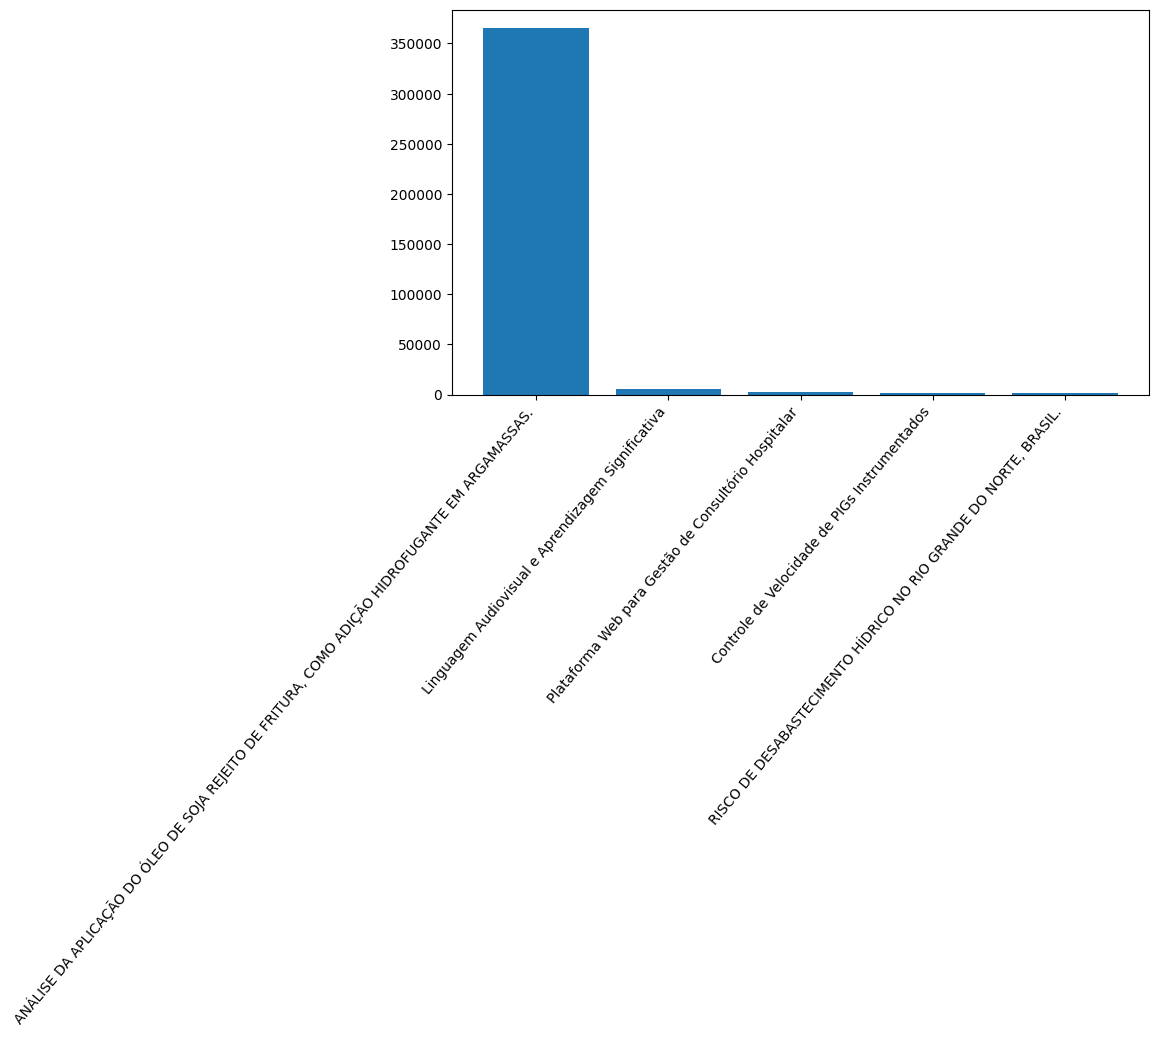

In [39]:
#Gerar gráfico com os 5 projetos de pesquisa com maior duração

x = pesquisa.sort_values(by=['duracao_dias'], ascending=False).head(5)['titulo']
y = pesquisa.sort_values(by=['duracao_dias'], ascending=False).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=50, ha='right')
plt.bar(x,y)
plt.show()

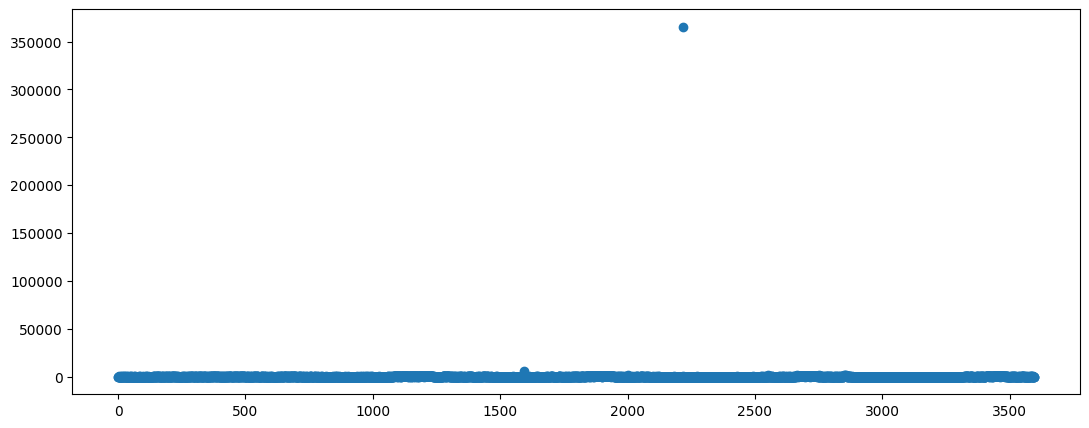

In [40]:
#Gerar gráfico com os 5 projetos de pesquisa com maior duração

'''
x = pesquisa.sort_values(by=['duracao_dias'], ascending=False).head(5)['titulo']
y = pesquisa.sort_values(by=['duracao_dias'], ascending=False).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=50, ha='right')
plt.bar(x,y)
plt.show()'''

import matplotlib.pyplot as plt
%matplotlib inline

x = pesquisa.index
y = pesquisa['duracao_dias']
plt.figure(figsize=(13,5))
plt.scatter(x,y)
plt.show()

<Axes: >

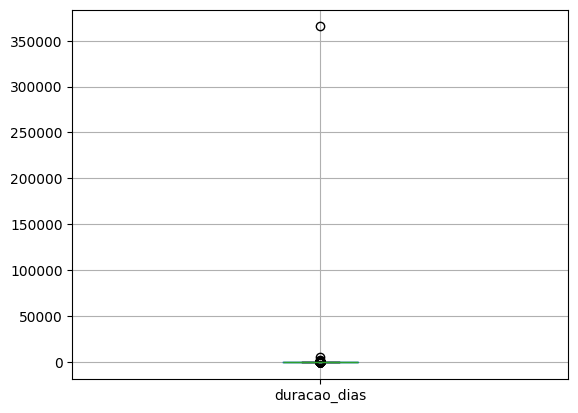

In [41]:
pesquisa.boxplot(column=['duracao_dias'])

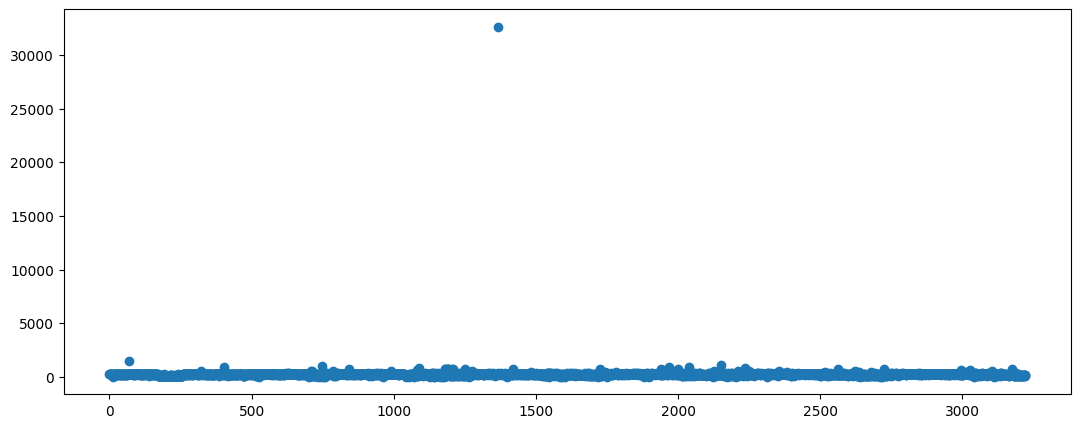

In [42]:
#Gerar gráfico com os 5 projetos de pesquisa com maior duração

'''
x = pesquisa.sort_values(by=['duracao_dias'], ascending=False).head(5)['titulo']
y = pesquisa.sort_values(by=['duracao_dias'], ascending=False).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=50, ha='right')
plt.bar(x,y)
plt.show()'''

import matplotlib.pyplot as plt
%matplotlib inline

x = extensao.index
y = extensao['duracao_dias']
plt.figure(figsize=(13,5))
plt.scatter(x,y)
plt.show()

<Axes: >

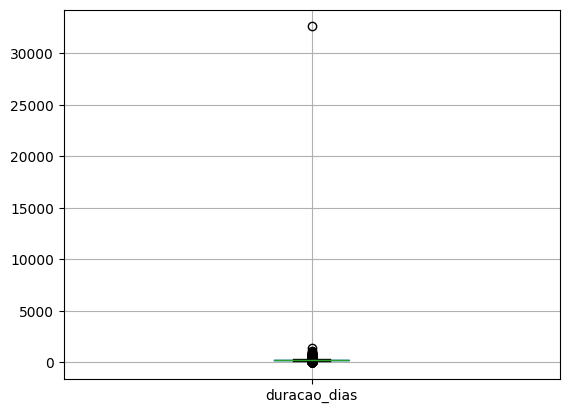

In [43]:
extensao.boxplot(column=['duracao_dias'])

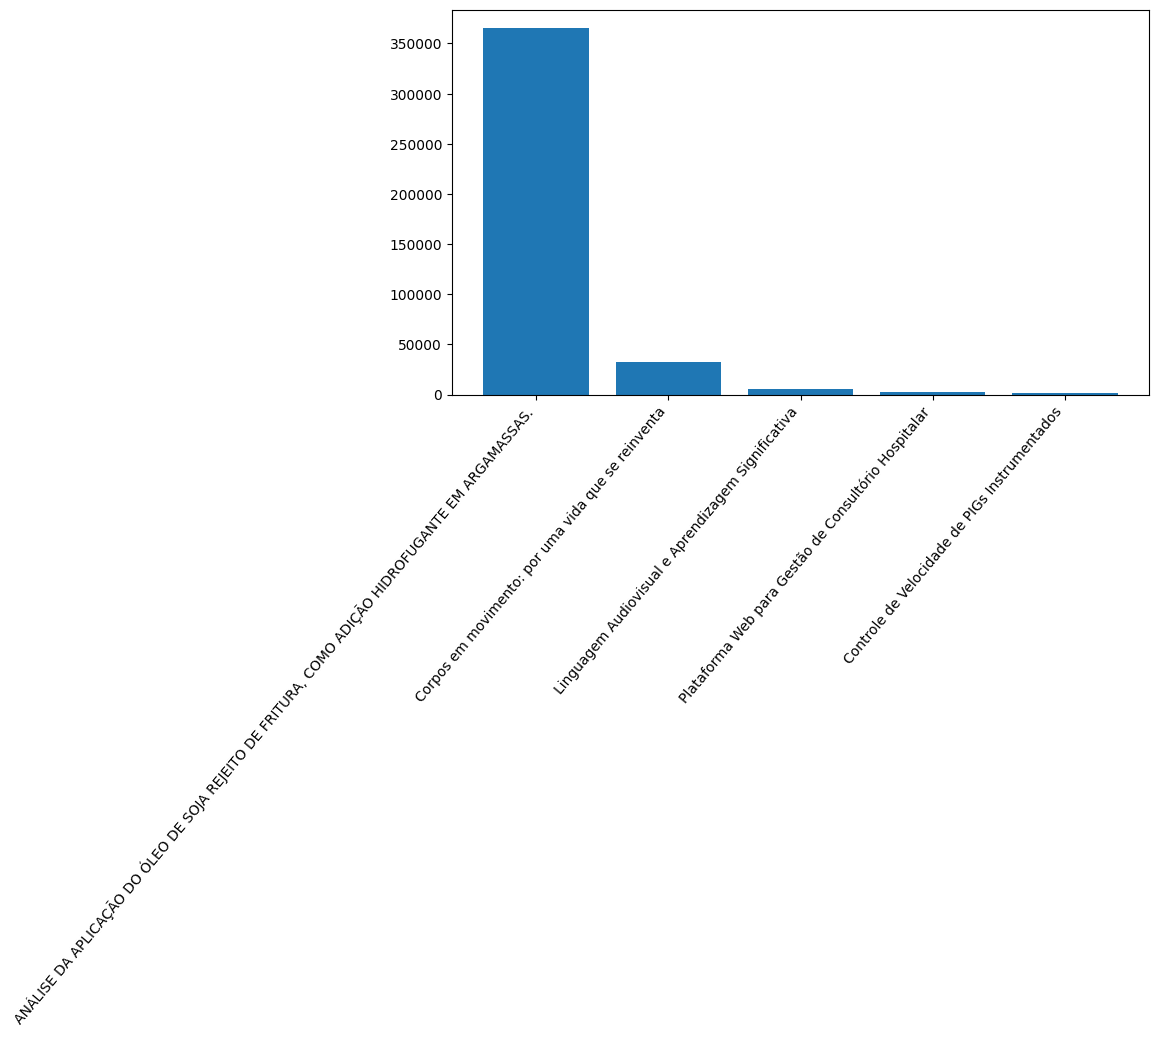

In [44]:
#Gerar gráfico com os 5 projetos gerais com maior duração
x = projetos.sort_values(by=['duracao_dias'], ascending=False).head(5)['titulo']
y = projetos.sort_values(by=['duracao_dias'], ascending=False).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=50, ha='right')
plt.bar(x,y)
plt.show()

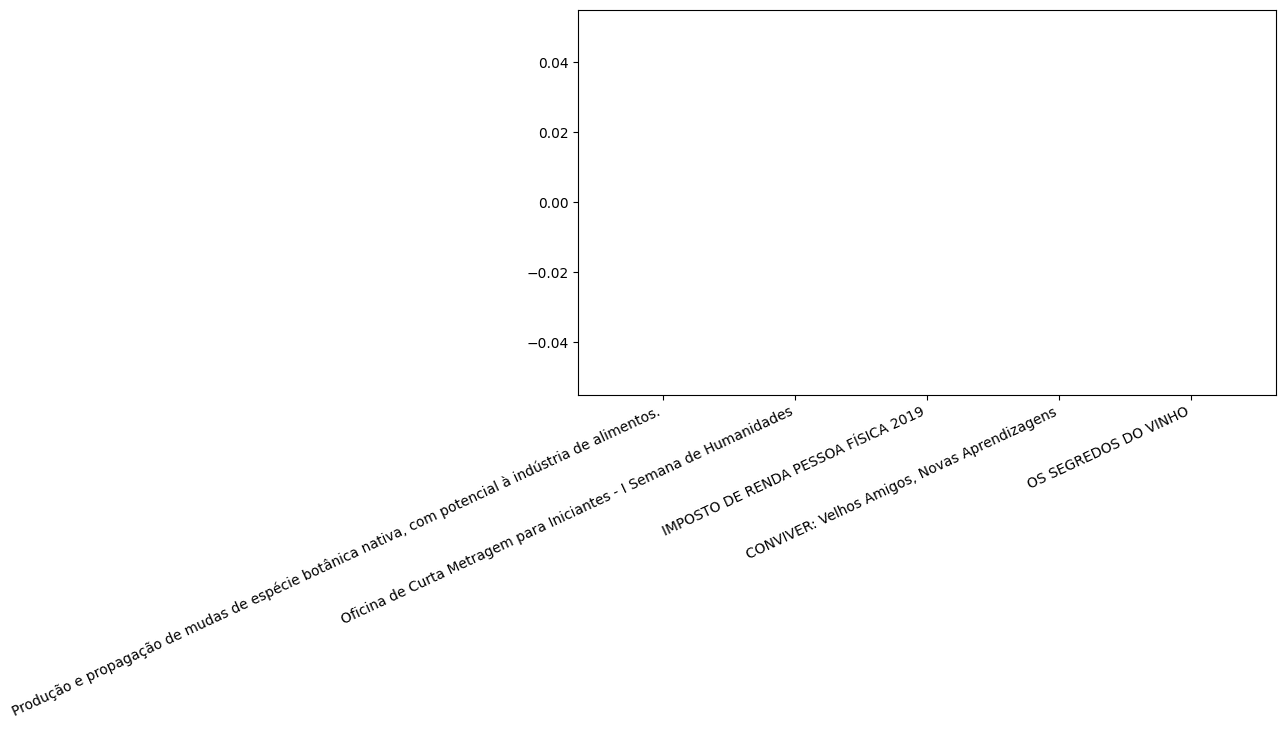

In [45]:
#Gerar gráfico com os 5 projetos com menor  duração
x = projetos.sort_values(by=['duracao_dias']).head(5)['titulo']
y = projetos.sort_values(by=['duracao_dias']).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=25, ha='right')
plt.bar(x,y)
plt.show()

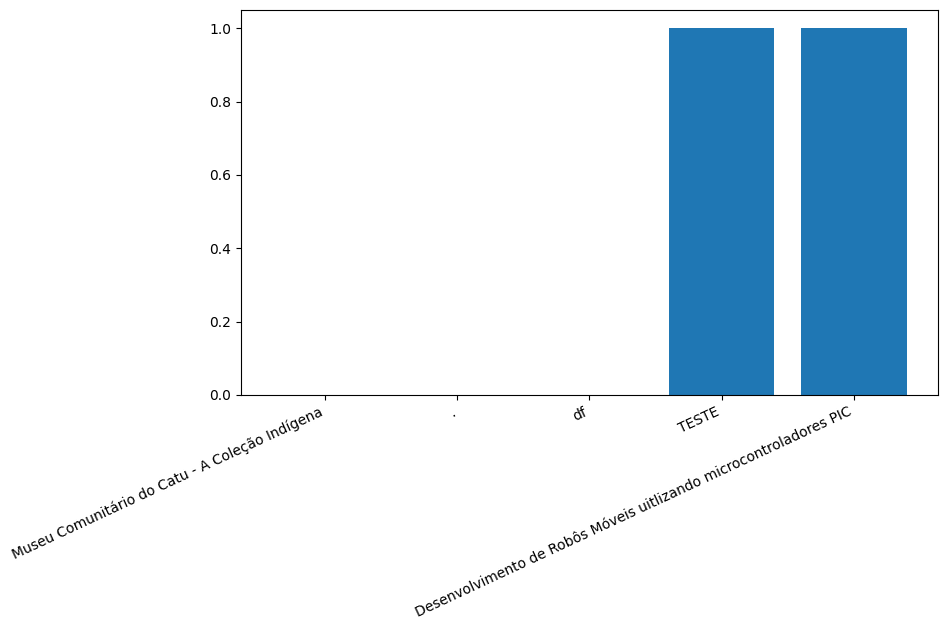

In [46]:
#Gerar gráfico com os 5 projetos de pesquisa com menor  duração
x = pesquisa.sort_values(by=['duracao_dias']).head(5)['titulo']
y = pesquisa.sort_values(by=['duracao_dias']).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=25, ha='right')
plt.bar(x,y)
plt.show()

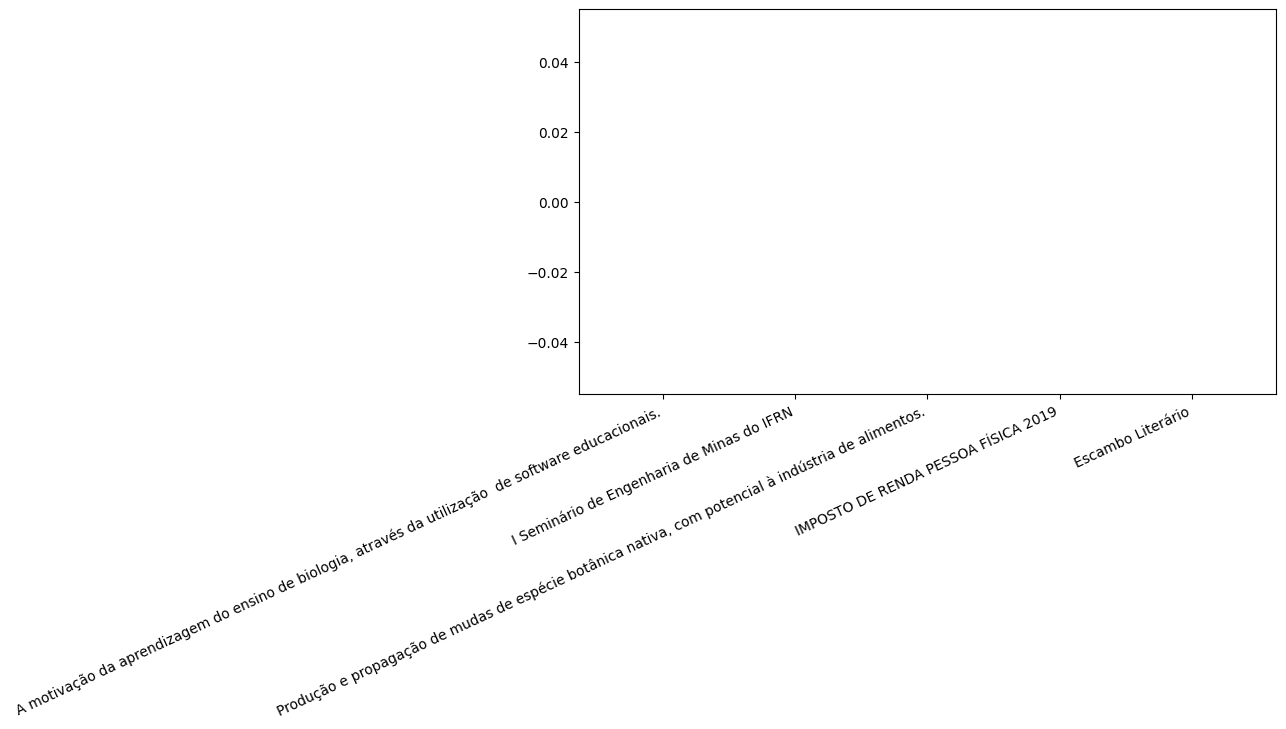

In [47]:
#Gerar gráfico com os 5 projetos de extensão com menor  duração
x = extensao.sort_values(by=['duracao_dias']).head(5)['titulo']
y = extensao.sort_values(by=['duracao_dias']).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=25, ha='right')
plt.bar(x,y)
plt.show()

In [48]:
pesquisa.sort_values(by=['duracao_dias']).head(5)

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo
3248,ANTROPOLOGIA,O projeto se propõe a continuidade de uma ação...,2019-12-02,Em execução,CIÊNCIAS HUMANAS,Apesar de ter iniciado legalmente o processo d...,Nilton Xavier Bezerra,3418,2019-12-02,70300003,70000000,"Geyson Fernandes da Silva, Maria José dos Sant...",Museu Comunitário do Catu - A Coleção Indígena,NaN,CANG,0,0.000000,pesquisa
2094,COMUNICAÇÃO,.,2018-02-01,Não Enviado,CIÊNCIAS SOCIAIS APLICADAS,.,Charles Hallan Fernandes dos Santos,2245,2018-02-01,60900008,60000007,Charles Hallan Fernandes dos Santos,.,Núcleo de Tecnologia em Telemática - NUTEL,PF,0,0.000000,pesquisa
1438,DESENHO INDUSTRIAL,ss,2017-02-17,Não Enviado,CIÊNCIAS SOCIAIS APLICADAS,sss,Marcus Vinicius de Faria Oliveira,1514,2017-02-17,61200000,60000007,"Gabrielly Letícia Siqueira Xavier, Marcus Vini...",df,"GRUPO DE PESQUISA EM LAZER, ESPORTE E SOCIEDAD...",CAL,0,0.000000,pesquisa
136,ENGENHARIA DE PRODUÇÃO,TESTE,2015-06-02,Não Enviado,ENGENHARIAS,TESTE,Fernanda Barreto de Almeida Rocha Mariz,137,2015-06-01,30800005,30000009,Fernanda Barreto de Almeida Rocha Mariz,TESTE,"LOGIN - Grupo de Pesquisa de Logística, Gestão...",SGA,1,0.033333,pesquisa
176,ENGENHARIA ELÉTRICA,xxx,2015-06-25,Não Enviado,ENGENHARIAS,xxx,Pedro Ivo de Araujo do Nascimento,177,2015-06-24,30400007,30000009,Pedro Ivo de Araujo do Nascimento,Desenvolvimento de Robôs Móveis uitlizando mic...,Núcleo de Pesquisa em Recursos Naturais e Ensi...,ZN,1,0.033333,pesquisa


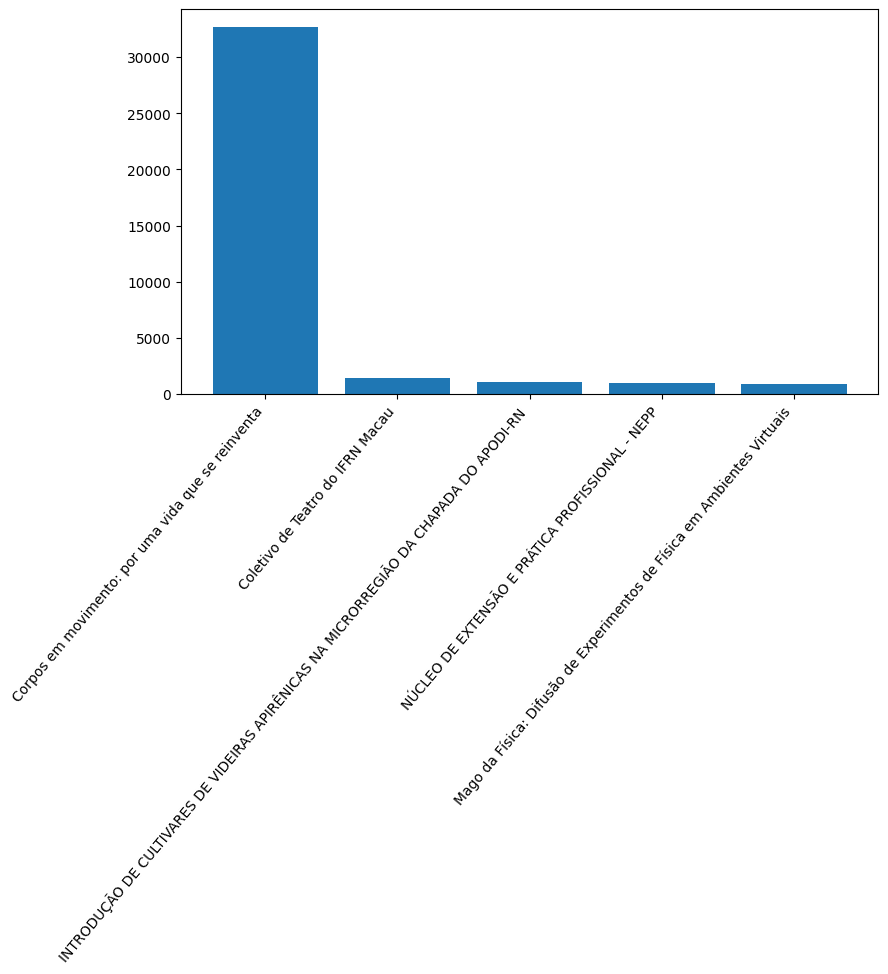

In [49]:
#Gerar gráfico com os 5 projetos de extensão gerais com maior duração
x = extensao.sort_values(by=['duracao_dias'], ascending=False).head(5)['titulo']
y = extensao.sort_values(by=['duracao_dias'], ascending=False).head(5)['duracao_dias']
plt.figure(figsize=(9,5))
plt.xticks(rotation=50, ha='right')
plt.bar(x,y)
plt.show()

In [50]:
#Gerar gráfico com os 5 projetos de pesquisa com maior duração

pesquisa.sort_values(by=['duracao_dias'], ascending=False).head(5)

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo
2216,ENGENHARIA CIVIL,A impermeabilização por meio de sabões e óleos...,2018-11-16,Concluído,ENGENHARIAS,Com o aumento populacional aumentou-se também ...,Wesley Feu dos Santos,2368,1018-04-16,30100003,30000009,"Francisco Silva Ripardo, Emanuelly Pereira de ...",ANÁLISE DA APLICAÇÃO DO ÓLEO DE SOJA REJEITO D...,"Representação, projetos e sustentabilidade em ...",SGA,365457,12181.900000,pesquisa
1594,EDUCAÇÃO,O projeto de pesquisa Linguagem Audiovisual e ...,2018-02-02,Não selecionado,CIÊNCIAS HUMANAS,Nas últimas décadas do século XX precisamente ...,Jeniffer Campos de Azevedo Varela,1691,2002-05-02,70800006,70000000,"Luiz Alberício de Araújo Neto, Jeniffer Campos...",Linguagem Audiovisual e Aprendizagem Significa...,NIEMAS - NÚCLEO INTERDISCIPLINAR DE ESTUDOS EM...,SPP,5755,191.833333,pesquisa
2002,CIÊNCIA DA COMPUTAÇÃO,O presente trabalho visa a construção de um si...,2017-12-31,Concluído,CIÊNCIAS EXATAS E DA TERRA,Observando o contexto no qual as clínicas da r...,Romerito Campos de Andrade,2148,2012-05-01,10300007,10000003,"LAURA ARAÚJO MEDEIROS, Laura Araujo Maia, GEÍS...",Plataforma Web para Gestão de Consultório Hosp...,Grupo de Pesquisa em Tecnologias da Informação,CA,2070,69.000000,pesquisa
2551,ENGENHARIA ELÉTRICA,A inspeção de dutos utilizando um dispositivo ...,2019-07-10,Concluído,ENGENHARIAS,A crescente demanda por transporte de matéria ...,Gustavo Fernandes de Lima,2705,2015-07-06,30400007,30000009,"Gustavo Fernandes de Lima, Victor Carvalho Gal...",Controle de Velocidade de PIGs Instrumentados,Grupo de Pesquisa em Mecatrônica - GPMEC,PAR,1465,48.833333,pesquisa
2857,GEOGRAFIA,"O objeto desta pesquisa, em nível de douto...",2021-03-15,Em execução,CIÊNCIAS HUMANAS,"A estiagem prolongada no semiárido brasileiro,...",Yuri Marques Macedo,3014,2017-03-15,70600007,70000000,Yuri Marques Macedo,RISCO DE DESABASTECIMENTO HÍDRICO NO RIO GRAND...,"Sociedade, Território e Identidade",MC,1461,48.700000,pesquisa


# dados da tabela

In [51]:
#desfio padrão projetos de pesqusisa geral
projetos.groupby('coordenador')['coordenador'].count().std()

4.266903769036413

In [52]:
#Média de pesquisadores por projetos geral
projetos.groupby('coordenador')['coordenador'].count().mean()

4.294080604534005

In [53]:
# media de duração de todos os projetos
projetos['duracao_meses'].mean()

10.051146306887617

In [54]:
pesquisa['duracao_dias'].max()

365457

In [59]:
projetos.groupby('area_conhecimento')['area_conhecimento'].count()

area_conhecimento
CIÊNCIAS AGRÁRIAS               312
CIÊNCIAS BIOLÓGICAS             102
CIÊNCIAS DA SAÚDE                48
CIÊNCIAS EXATAS E DA TERRA     1047
CIÊNCIAS HUMANAS                395
CIÊNCIAS SOCIAIS APLICADAS      289
ENGENHARIAS                     844
LINGUÍSTICA, LETRAS E ARTES     205
MULTIDISCIPLINAR                355
Name: area_conhecimento, dtype: int64

In [55]:
pesquisa[pesquisa['duracao_dias'] == pesquisa['duracao_dias'].max()]

,area,resumo,fim_execucao,situacao,area_conhecimento,justificativa,coordenador,id,inicio_execucao,codigo_sub_area_conhecimento,codigo_area_conhecimento,equipe,titulo,grupo,campus,duracao_dias,duracao_meses,tipo
2216,ENGENHARIA CIVIL,A impermeabilização por meio de sabões e óleos...,2018-11-16,Concluído,ENGENHARIAS,Com o aumento populacional aumentou-se também ...,Wesley Feu dos Santos,2368,1018-04-16,30100003,30000009,"Francisco Silva Ripardo, Emanuelly Pereira de ...",ANÁLISE DA APLICAÇÃO DO ÓLEO DE SOJA REJEITO D...,"Representação, projetos e sustentabilidade em ...",SGA,365457,12181.9,pesquisa


In [56]:
pesquisa.loc[pesquisa[pesquisa['duracao_dias'] == pesquisa['duracao_dias'].max()].index,['inicio_execucao']] = '2018-04-16'

In [57]:
#lista_produtos.loc[pesquisa[pesquisa['duracao_dias'] == pesquisa['duracao_dias'].max()].index,['inicio_execucao']] = '2018-04-16'

In [58]:
pesquisa.loc[2216, ['inicio_execucao']]

inicio_execucao    2018-04-16
Name: 2216, dtype: object

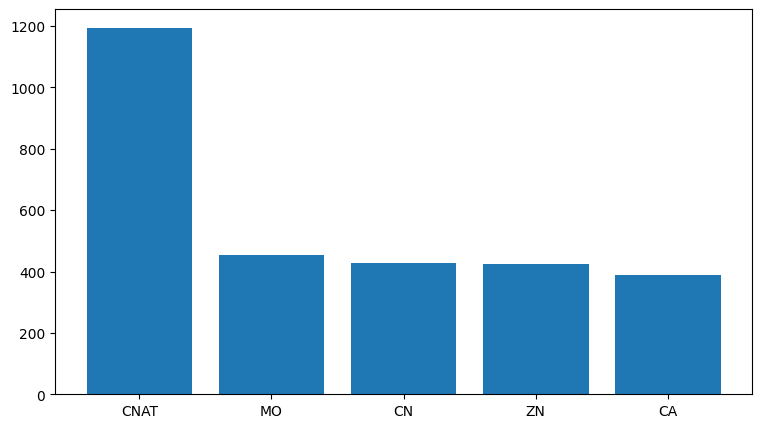

In [59]:
#5 Campi com mais projetos (geral)
campus = projetos.groupby('campus')['campus'].count().sort_values(ascending=False).head(5)
x = campus.index
y = campus.values
plt.figure(figsize=(9,5))
plt.bar(x,y)
plt.show()

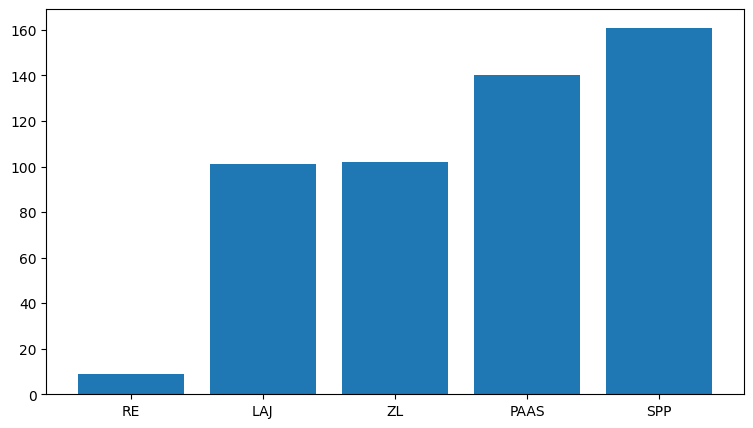

In [60]:
#5 Campi que menos  desenvolveram projetos de projetos de pesquisa 
campus = projetos.groupby('campus')['campus'].count().sort_values().head(5)
x = campus.index
y = campus.values
plt.figure(figsize=(9,5))
plt.bar(x,y)
plt.show()

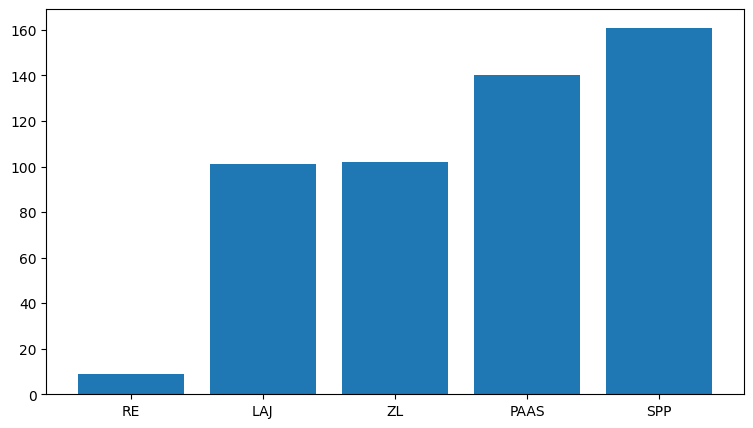

In [61]:
#5 Campi com menos projetos (geral)
campus = projetos.groupby('campus')['campus'].count().sort_values().head(5)
x = campus.index
y = campus.values
plt.figure(figsize=(9,5))
plt.bar(x,y)
plt.show()

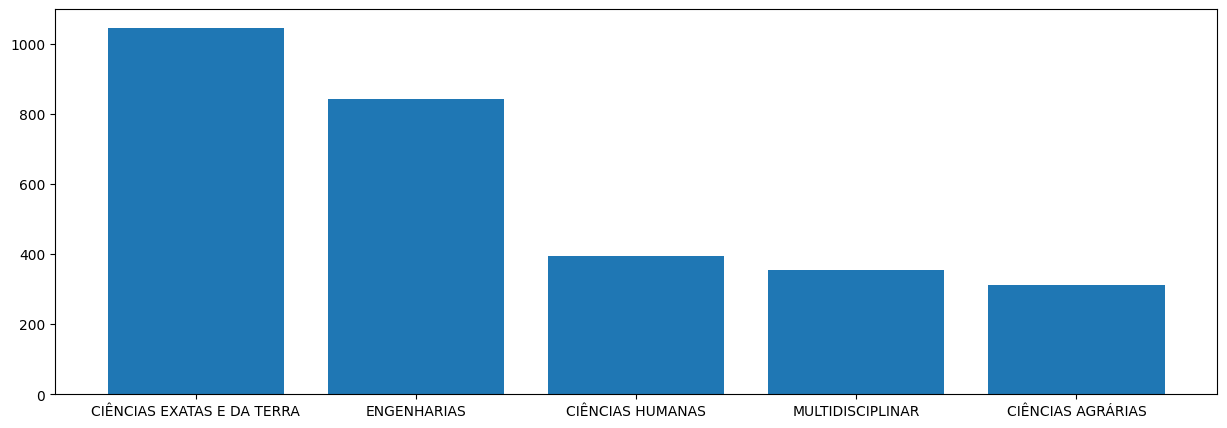

In [62]:
# 5 áreas com a maior quantidade de projetos (geral)
area = projetos.groupby('area_conhecimento')['area_conhecimento'].count().sort_values(ascending=False).head(5)
x = area.index
y = area.values
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.show()

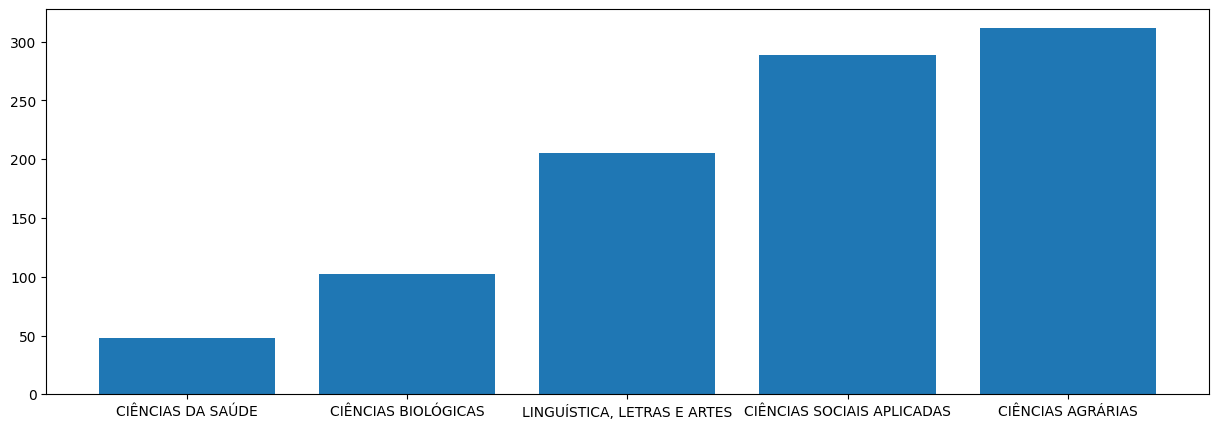

In [63]:
# 5 áreas com menos quantidade de projetos (geral)
area = projetos.groupby('area_conhecimento')['area_conhecimento'].count().sort_values().head(5)
x = area.index
y = area.values
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.show()

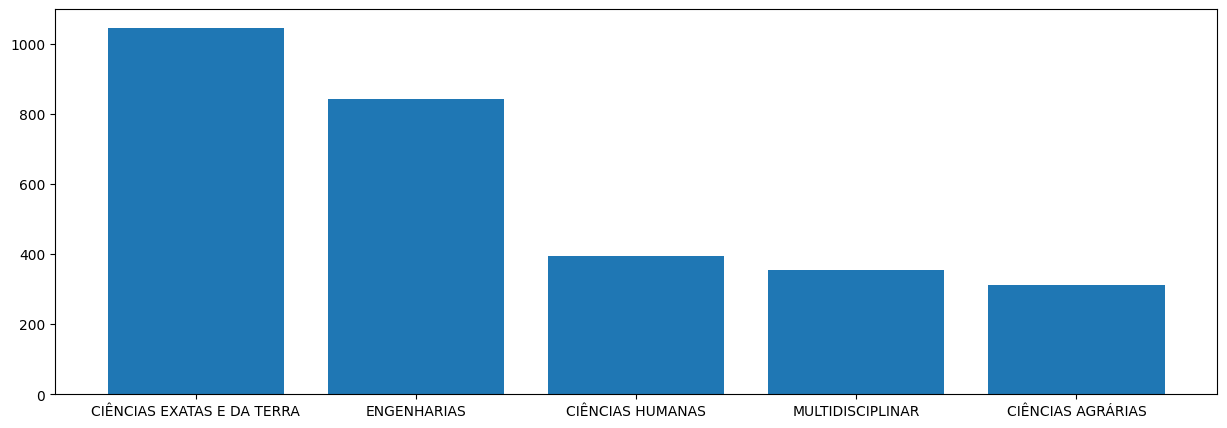

In [64]:
# 5 áreas com a maior quantidade de projetos (geral)
area = pesquisa.groupby('area_conhecimento')['area_conhecimento'].count().sort_values(ascending=False).head(5)
x = area.index
y = area.values
plt.figure(figsize=(15,5))
plt.bar(x,y)
plt.show()

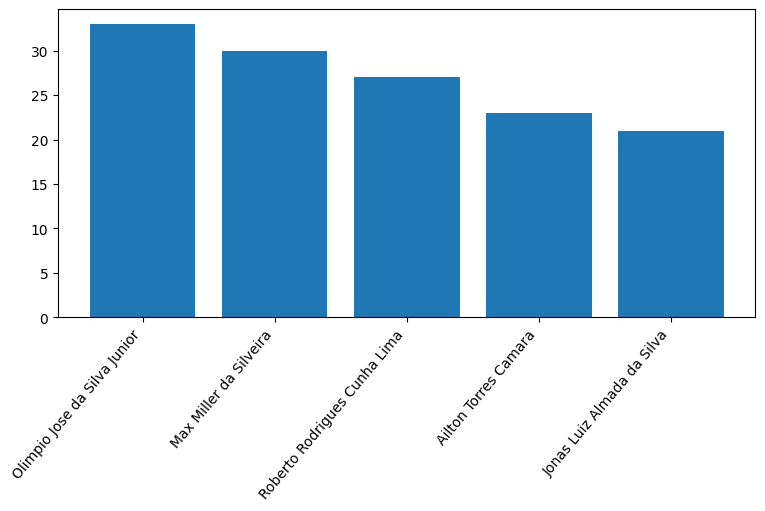

In [65]:
# quantidades de projetos de pesquisa por pesquisador
#pesquisa.groupby('coordenador')['coordenador'].count().head(6)
pesquisa_pesquisador = pesquisa.groupby('coordenador')['coordenador'].count().sort_values(ascending=False).head(5)
x = pesquisa_pesquisador.index
y = pesquisa_pesquisador.values
plt.figure(figsize=(9,4))
plt.bar(x,y)
plt.xticks(rotation=50, ha='right')
plt.show()

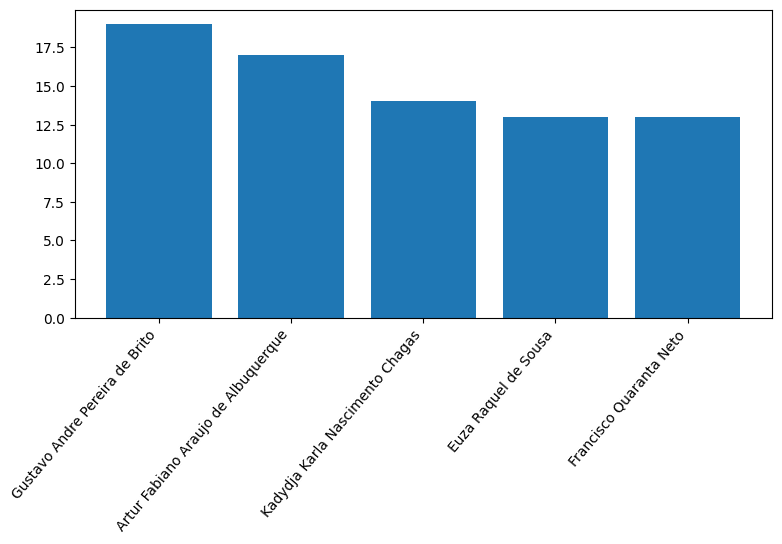

In [66]:
# quantidades de projetos de estensão por pesquisador
#pesquisa.groupby('coordenador')['coordenador'].count().head(6)
extensao_pesquisador = extensao.groupby('coordenador')['coordenador'].count().sort_values(ascending=False).head(5)
x = extensao_pesquisador.index
y = extensao_pesquisador.values
plt.figure(figsize=(9,4))
plt.bar(x,y)
plt.xticks(rotation=50, ha='right')
plt.show()